In [71]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import ternary as tr


Se agrega conjunto de datos y se pasa a dataframe

In [72]:
#Leer el archivo
df = pd.read_csv("../Inputs/GFADataset.csv")
df.head()

,index,Formula,Phase,state,batch
0,0,Ag27Cu73,CRA,Procesado,15
1,1,Ag35Ca65,BMG,No Procesado,2
2,2,Ag42Fe58,CRA,No Procesado,20
3,3,Ag48Cu52,CRA,No Procesado,11
4,4,Ag48Fe52,CRA,Procesado,10


In [73]:
df['Compuesto'] = df['Formula'].str.replace(r'[0-9]', '')
df['Compuesto'] = df['Compuesto'].str.replace(r'.', '')
df.head()

C:\Users\feder\AppData\Local\Temp\ipykernel_6152\3581365489.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Compuesto'] = df['Formula'].str.replace(r'[0-9]', '')
C:\Users\feder\AppData\Local\Temp\ipykernel_6152\3581365489.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Compuesto'] = df['Compuesto'].str.replace(r'.', '')


,index,Formula,Phase,state,batch,Compuesto
0,0,Ag27Cu73,CRA,Procesado,15,AgCu
1,1,Ag35Ca65,BMG,No Procesado,2,AgCa
2,2,Ag42Fe58,CRA,No Procesado,20,AgFe
3,3,Ag48Cu52,CRA,No Procesado,11,AgCu
4,4,Ag48Fe52,CRA,Procesado,10,AgFe


In [74]:
df2 = pd.read_csv('../Inputs/TablaPeriodica.csv', sep=';')
df2.head()

lista_elementos = df2['Element'].tolist()
lista_elementos

['Ag',
 'Al',
 'Au',
 'B',
 'Ba',
 'Be',
 'C',
 'Ca',
 'Ce',
 'Co',
 'Cr',
 'Cu',
 'Dy',
 'Er',
 'Fe',
 'Ga',
 'Gd',
 'Ge',
 'Hf',
 'Ho',
 'In',
 'Ir',
 'La',
 'Li',
 'Lu',
 'Mg',
 'Mn',
 'Mo',
 'Nb',
 'Nd',
 'Ni',
 'P',
 'Pb',
 'Pd',
 'Pr',
 'Pt',
 'Rh',
 'Ru',
 'Sb',
 'Sc',
 'Si',
 'Sm',
 'Sn',
 'Sr',
 'Ta',
 'Tb',
 'Ti',
 'Tm',
 'U',
 'V',
 'W',
 'Y',
 'Yb',
 'Zn',
 'Zr']

In [75]:
def contar_elementos(dataCompuestos):
  sumaelementos = pd.DataFrame(columns=['Element', 'Count'])
  for elemento in lista_elementos:
    sumaelementos = pd.concat([sumaelementos, pd.DataFrame({'Element': [elemento], 'Count': [dataCompuestos['Compuesto'].str.count(elemento).sum()]})])
  return sumaelementos



In [76]:
#compuestos BMG
df3=list(df.groupby('Phase'))
#BMG
df4=df3[0][1]
#CRA
df5=df3[1][1]
#RMG
df6=df3[2][1]

df4





,index,Formula,Phase,state,batch,Compuesto
1,1,Ag35Ca65,BMG,No Procesado,2,AgCa
26,26,Al33.6Ca66.4,BMG,No Procesado,12,AlCa
150,150,B17Fe83,BMG,No Procesado,19,BFe
273,273,Cu46Zr54,BMG,Procesado,7,CuZr
276,276,Cu50Mg50,BMG,No Procesado,14,CuMg
...,...,...,...,...,...,...
6410,6410,Zr20.0Hf20.0Ti20.0Cu20.0Fe20.0,BMG,No Procesado,18,ZrHfTiCuFe
6411,6411,Zr20.0Hf20.0Ti20.0Cu20.0Ni20.0,BMG,No Procesado,17,ZrHfTiCuNi
6412,6412,Al16.7Cr16.7Mo16.7Ta16.7Ti16.7Zr16.7,BMG,Procesado,7,AlCrMoTaTiZr
6413,6413,Sr16.7Ca16.7Yb16.7Mg16.7Zn16.7Cu16.7,BMG,No Procesado,11,SrCaYbMgZnCu


In [77]:
df7 = contar_elementos(df)
#BMG
df8 = contar_elementos(df4)
#CRA
df9 = contar_elementos(df5)
#RMG
df10 = contar_elementos(df6)

df7['Count BMG']=df8['Count']
df7['Count CRA']=df9['Count']
df7['Count RMG']=df10['Count']

df7




,Element,Count,Count BMG,Count CRA,Count RMG
0,Ag,337,163,85,89
0,Al,1867,385,624,858
0,Au,62,10,1,51
0,B,1948,367,394,1187
0,Ba,22,0,0,22
0,Be,116,56,31,29
0,C,4117,1218,1077,1822
0,Ca,199,123,23,53
0,Ce,300,54,126,120
0,Co,987,184,231,572


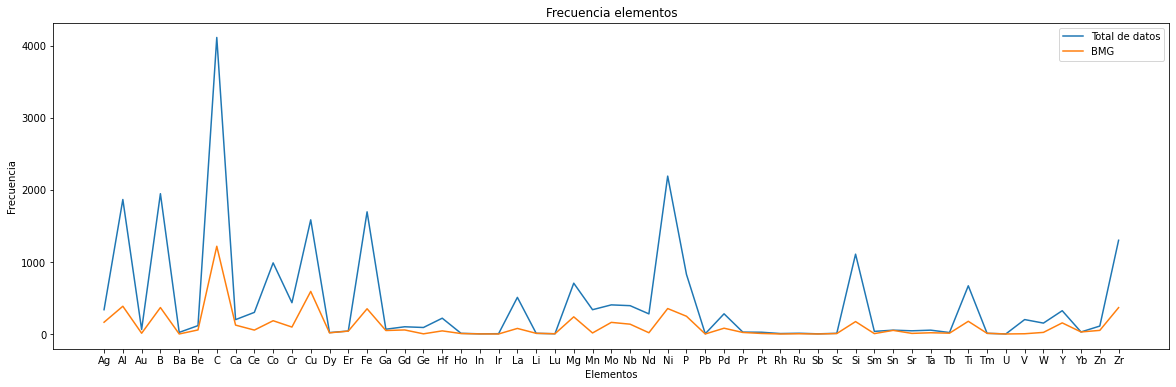

In [78]:
plt.figure(figsize=(20,6))
plt.title('Frecuencia elementos')
plt.xlabel('Elementos')
plt.ylabel('Frecuencia')
plt.plot(df7['Element'],df7['Count'],label='Total de datos')
plt.plot(df7['Element'],df8['Count'],label='BMG')
plt.legend()
plt.show()

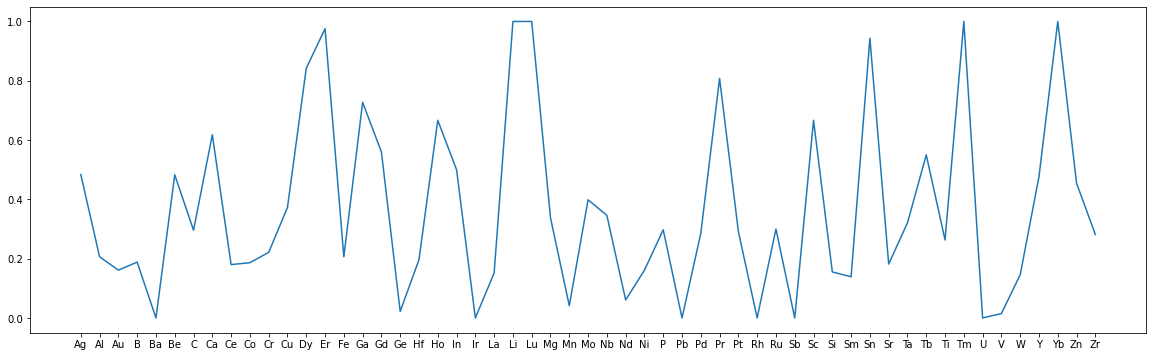

In [79]:
plt.figure(figsize=(20,6))
cous=[]
for i in range(len(df7)):
  cous.append(df8.iloc[i]['Count']/df7.iloc[i]['Count'])

plt.plot(df7['Element'],cous)

In [80]:
df11=df['Compuesto'].value_counts()
df11

AlLaNi             184
AlNiZr             169
BFeNi              125
BCoMn              116
BCrFe              108
                  ... 
YFeAl                1
WRuB                 1
TmAlCo               1
TiCuNi               1
AlMoNbSiTaTiVZr      1
Name: Compuesto, Length: 804, dtype: int64

In [81]:
lcompuesto=list(df.groupby('Compuesto'))
df12=pd.DataFrame()
for nombre,valores in lcompuesto:
  if nombre=="AlLaNi":
    df12=valores
df12


,index,Formula,Phase,state,batch,Compuesto
691,691,Al10La10Ni80,CRA,No Procesado,3,AlLaNi
692,692,Al10La20Ni70,CRA,No Procesado,14,AlLaNi
693,693,Al10La25Ni65,CRA,No Procesado,12,AlLaNi
694,694,Al10La30Ni60,RMG,No Procesado,13,AlLaNi
695,695,Al10La35Ni55,RMG,Procesado,7,AlLaNi
...,...,...,...,...,...,...
1940,1940,Al90La5Ni5,CRA,No Procesado,11,AlLaNi
1941,1941,Al90La8Ni2,RMG,No Procesado,4,AlLaNi
1963,1963,Al91La5Ni4,RMG,No Procesado,6,AlLaNi
1964,1964,Al91La7Ni2,RMG,No Procesado,17,AlLaNi


Codigo

In [82]:
def separar_formula(formula):
    """
    Toma una fórmula química y la separa en elementos y sus composiciones.
    Devuelve un diccionario que contiene los elementos y sus cantidades.
    """
    formula=formula.replace("{","(")
    formula=formula.replace("[","(")
    formula=formula.replace("}",")")
    formula=formula.replace("]",")")
    # Definir una expresión regular para buscar elementos y sus composiciones en la fórmula.
    patron = r"([A-Z][a-z]*)(\d*(?:\.\d+)?)|(\()|(\))(\d*(?:\.\d+)?)"
    
    # Buscar todos los elementos y sus composiciones en la fórmula.
    elementos = re.findall(patron, formula)

    # Crear una pila para guardar los elementos y sus composiciones mientras se analiza la fórmula.
    pila = []
    
    # Iterar sobre cada elemento encontrado en la fórmula.
    for elemento, cantidad, parentesis_abierto, parentesis_cerrado, cantidad_parentesis in elementos:
        if elemento != "":
            # Si se encuentra un elemento, agregarlo a la pila con su cantidad correspondiente.
            if cantidad == "":
                cantidad = "1"
            pila.append({elemento: float(cantidad)})
        elif parentesis_abierto != "":
            # Si se encuentra un paréntesis abierto, agregar una nueva pila vacía.
            pila.append([])
        elif parentesis_cerrado != "":
            # Si se encuentra un paréntesis cerrado, calcular la composición dentro del paréntesis
            # y agregarla a la pila anterior. Luego, multiplicar la composición por la cantidad
            # especificada después del paréntesis cerrado (si existe).
            sub_composicion = {}
            while True:
                # Sacar elementos de la pila actual hasta encontrar el paréntesis abierto correspondiente.
                elem = pila.pop()
                if isinstance(elem, dict):
                    for k, v in elem.items():
                        if k in sub_composicion:
                            sub_composicion[k] += v
                        else:
                            sub_composicion[k] = v
                else:
                    break
            sub_cantidad = 1.0
            if cantidad_parentesis != "":
                sub_cantidad = float(cantidad_parentesis)
            for k, v in sub_composicion.items():
                sub_composicion[k] = v * sub_cantidad
            pila.append(sub_composicion)
            #pila[-1].append(sub_composicion)
    
    for i in range(len(pila)):
    #if(len(pila)>1):
      pila[0].update(pila[i])
    # Convert object to a list
    data = list(pila[0].values())
    # Convert list to an array
    numpyArray = np.array(data)
    total=sum(numpyArray)
    resultado=pila[0]
    #base 100
    for key,value in resultado.items():
      resultado[key]=value/total*100
    
    # La pila resultante debe tener un solo elemento (el diccionario de composición completo).
    # Extraer este elemento de la pila y devolverlo.
    return resultado#pila.pop()[0]

# Ejemplo de uso:
formula = "Al9Y9"
composicion = separar_formula(formula)
print(composicion) # Salida: {'Fe': 45.72, 'Co': 30.48, 'B': 1.92, 'Si': 0.48, 'Nb': 1.92, 'Cr': 4.0}



{'Al': 50.0, 'Y': 50.0}


In [83]:
def separar_composicion(row):
    return separar_formula(row['Formula'])
df['Separado']=df.apply(separar_composicion, axis=1)
df

,index,Formula,Phase,state,batch,Compuesto,Separado
0,0,Ag27Cu73,CRA,Procesado,15,AgCu,"{'Ag': 27.0, 'Cu': 73.0}"
1,1,Ag35Ca65,BMG,No Procesado,2,AgCa,"{'Ag': 35.0, 'Ca': 65.0}"
2,2,Ag42Fe58,CRA,No Procesado,20,AgFe,"{'Ag': 42.0, 'Fe': 57.99999999999999}"
3,3,Ag48Cu52,CRA,No Procesado,11,AgCu,"{'Ag': 48.0, 'Cu': 52.0}"
4,4,Ag48Fe52,CRA,Procesado,10,AgFe,"{'Ag': 48.0, 'Fe': 52.0}"
...,...,...,...,...,...,...,...
6410,6410,Zr20.0Hf20.0Ti20.0Cu20.0Fe20.0,BMG,No Procesado,18,ZrHfTiCuFe,"{'Zr': 20.0, 'Hf': 20.0, 'Ti': 20.0, 'Cu': 20...."
6411,6411,Zr20.0Hf20.0Ti20.0Cu20.0Ni20.0,BMG,No Procesado,17,ZrHfTiCuNi,"{'Zr': 20.0, 'Hf': 20.0, 'Ti': 20.0, 'Cu': 20...."
6412,6412,Al16.7Cr16.7Mo16.7Ta16.7Ti16.7Zr16.7,BMG,Procesado,7,AlCrMoTaTiZr,"{'Al': 16.666666666666664, 'Cr': 16.6666666666..."
6413,6413,Sr16.7Ca16.7Yb16.7Mg16.7Zn16.7Cu16.7,BMG,No Procesado,11,SrCaYbMgZnCu,"{'Sr': 16.666666666666664, 'Ca': 16.6666666666..."


In [84]:
df4['Separado']=df4.apply(separar_composicion, axis=1)
df5['Separado']=df5.apply(separar_composicion, axis=1)
df6['Separado']=df6.apply(separar_composicion, axis=1)

In [85]:
def separa_mapa(mapa,fase):
  a=list(mapa.items())
  a.append(fase)
  return a
def solo_dos(arrayd):
  arrayo=[arrayd[0][1],arrayd[1][1],arrayd[3]]
  return arrayo

#ejemplo
formula=separa_mapa({'Al': 80.0, 'La': 10.0, 'Ni': 10.0},'BMG')
print(formula)
necesarios=solo_dos(formula)
print(necesarios)

#def com_fase()
def para_triangulo(row):
  sp=separa_mapa(row['Separado'],row['Phase'])
  return solo_dos(sp)

[('Al', 80.0), ('La', 10.0), ('Ni', 10.0), 'BMG']
[80.0, 10.0, 'BMG']


In [86]:
#dividir map composicion
df12['Separado']=df12.apply(separar_composicion, axis=1)
df12['triangulo']=df12.apply(para_triangulo,axis=1)
df12

,index,Formula,Phase,state,batch,Compuesto,Separado,triangulo
691,691,Al10La10Ni80,CRA,No Procesado,3,AlLaNi,"{'Al': 10.0, 'La': 10.0, 'Ni': 80.0}","[10.0, 10.0, CRA]"
692,692,Al10La20Ni70,CRA,No Procesado,14,AlLaNi,"{'Al': 10.0, 'La': 20.0, 'Ni': 70.0}","[10.0, 20.0, CRA]"
693,693,Al10La25Ni65,CRA,No Procesado,12,AlLaNi,"{'Al': 10.0, 'La': 25.0, 'Ni': 65.0}","[10.0, 25.0, CRA]"
694,694,Al10La30Ni60,RMG,No Procesado,13,AlLaNi,"{'Al': 10.0, 'La': 30.0, 'Ni': 60.0}","[10.0, 30.0, RMG]"
695,695,Al10La35Ni55,RMG,Procesado,7,AlLaNi,"{'Al': 10.0, 'La': 35.0, 'Ni': 55.00000000000001}","[10.0, 35.0, RMG]"
...,...,...,...,...,...,...,...,...
1940,1940,Al90La5Ni5,CRA,No Procesado,11,AlLaNi,"{'Al': 90.0, 'La': 5.0, 'Ni': 5.0}","[90.0, 5.0, CRA]"
1941,1941,Al90La8Ni2,RMG,No Procesado,4,AlLaNi,"{'Al': 90.0, 'La': 8.0, 'Ni': 2.0}","[90.0, 8.0, RMG]"
1963,1963,Al91La5Ni4,RMG,No Procesado,6,AlLaNi,"{'Al': 91.0, 'La': 5.0, 'Ni': 4.0}","[91.0, 5.0, RMG]"
1964,1964,Al91La7Ni2,RMG,No Procesado,17,AlLaNi,"{'Al': 91.0, 'La': 7.000000000000001, 'Ni': 2.0}","[91.0, 7.000000000000001, RMG]"


<AxesSubplot:>

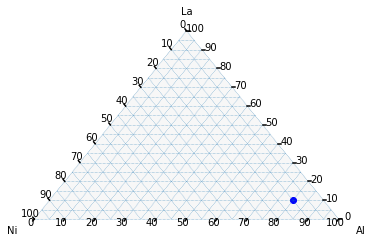

In [87]:
figure,triangulo=tr.figure(scale=100)
triangulo.gridlines(5)
triangulo.ticks(multiple=10)
triangulo.top_corner_label('La')
triangulo.get_axes().axis('off')
triangulo.left_corner_label('Ni')
triangulo.right_corner_label('Al')
triangulo.scatter([necesarios],label = 'BMG',color='blue')

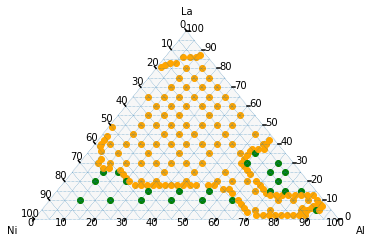

In [88]:
figure,triangulo=tr.figure(scale=100)
triangulo.gridlines(5)
triangulo.ticks(multiple=10)
triangulo.top_corner_label('La')
triangulo.get_axes().axis('off')
triangulo.left_corner_label('Ni')
triangulo.right_corner_label('Al')
#triangulo.scatter([necesarios],label = 'BMG',color='blue')
for i in df12['triangulo']:
  if i[2]=='BMG':
    triangulo.scatter([i],label = 'BMG',color='blue')
  elif i[2]=='CRA':
    triangulo.scatter([i],label = 'CRA',color='green')
  else:
    triangulo.scatter([i],label = 'RMG',color='orange')

In [89]:
#juntar elementos y funcion de trabajo

lista_trabajos = df2['W'].tolist()
lista_trabajos

[4.64,
 4.19,
 5.32,
 4.75,
 2.35,
 5.08,
 5.0,
 2.71,
 2.8,
 4.7,
 4.4,
 4.7,
 2.75,
 2.84,
 4.65,
 4.25,
 5.1,
 5.0,
 3.51,
 2.9,
 4.08,
 5.6,
 3.4,
 3.1,
 3.01,
 3.66,
 3.9,
 4.3,
 4.2,
 3.1,
 5.15,
 5.1,
 4.18,
 5.0,
 2.7,
 5.4,
 4.98,
 4.8,
 4.56,
 3.5,
 4.85,
 2.95,
 4.35,
 2.76,
 4.22,
 3.0,
 4.1,
 2.86,
 3.7,
 4.44,
 4.55,
 3.1,
 2.45,
 4.3,
 4.0]

In [90]:
conw={}
for i  in range(len( lista_elementos)):
  conw.update({lista_elementos[i]:lista_trabajos[i]})
conw

{'Ag': 4.64,
 'Al': 4.19,
 'Au': 5.32,
 'B': 4.75,
 'Ba': 2.35,
 'Be': 5.08,
 'C': 5.0,
 'Ca': 2.71,
 'Ce': 2.8,
 'Co': 4.7,
 'Cr': 4.4,
 'Cu': 4.7,
 'Dy': 2.75,
 'Er': 2.84,
 'Fe': 4.65,
 'Ga': 4.25,
 'Gd': 5.1,
 'Ge': 5.0,
 'Hf': 3.51,
 'Ho': 2.9,
 'In': 4.08,
 'Ir': 5.6,
 'La': 3.4,
 'Li': 3.1,
 'Lu': 3.01,
 'Mg': 3.66,
 'Mn': 3.9,
 'Mo': 4.3,
 'Nb': 4.2,
 'Nd': 3.1,
 'Ni': 5.15,
 'P': 5.1,
 'Pb': 4.18,
 'Pd': 5.0,
 'Pr': 2.7,
 'Pt': 5.4,
 'Rh': 4.98,
 'Ru': 4.8,
 'Sb': 4.56,
 'Sc': 3.5,
 'Si': 4.85,
 'Sm': 2.95,
 'Sn': 4.35,
 'Sr': 2.76,
 'Ta': 4.22,
 'Tb': 3.0,
 'Ti': 4.1,
 'Tm': 2.86,
 'U': 3.7,
 'V': 4.44,
 'W': 4.55,
 'Y': 3.1,
 'Yb': 2.45,
 'Zn': 4.3,
 'Zr': 4.0}

In [91]:
def mapear_trabajo(mapam):
  senW={}
  for elem,t in mapam.items():
    for elemento,trabajo in conw.items():
      if elem==elemento:
        senW.update({elemento:trabajo})
  return senW


def diferencia_trabajo(mapae):
  mayor=0
  for elemento,trabajo in mapae.items():
    if mayor==0:
      mayor=trabajo
      menor=trabajo
    elif mayor<trabajo:
      mayor=trabajo
    elif trabajo<menor:
      menor=trabajo
  return mayor-menor


  
#ejemplo
ftrabajo=mapear_trabajo({'Al': 80.0, 'La': 10.0, 'Ni': 10.0})
print(ftrabajo)
diferencia=diferencia_trabajo(ftrabajo)
print(diferencia)
print(round(diferencia,1))



{'Al': 4.19, 'La': 3.4, 'Ni': 5.15}
1.7500000000000004
1.8


In [92]:
def asignar_trabajo(row):
  mt=mapear_trabajo(row['Separado'])
  difee=diferencia_trabajo(mt)
  return round(difee,1)
df['resta trabajo']=df.apply(asignar_trabajo, axis=1)
df

,index,Formula,Phase,state,batch,Compuesto,Separado,resta trabajo
0,0,Ag27Cu73,CRA,Procesado,15,AgCu,"{'Ag': 27.0, 'Cu': 73.0}",0.1
1,1,Ag35Ca65,BMG,No Procesado,2,AgCa,"{'Ag': 35.0, 'Ca': 65.0}",1.9
2,2,Ag42Fe58,CRA,No Procesado,20,AgFe,"{'Ag': 42.0, 'Fe': 57.99999999999999}",0.0
3,3,Ag48Cu52,CRA,No Procesado,11,AgCu,"{'Ag': 48.0, 'Cu': 52.0}",0.1
4,4,Ag48Fe52,CRA,Procesado,10,AgFe,"{'Ag': 48.0, 'Fe': 52.0}",0.0
...,...,...,...,...,...,...,...,...
6410,6410,Zr20.0Hf20.0Ti20.0Cu20.0Fe20.0,BMG,No Procesado,18,ZrHfTiCuFe,"{'Zr': 20.0, 'Hf': 20.0, 'Ti': 20.0, 'Cu': 20....",1.2
6411,6411,Zr20.0Hf20.0Ti20.0Cu20.0Ni20.0,BMG,No Procesado,17,ZrHfTiCuNi,"{'Zr': 20.0, 'Hf': 20.0, 'Ti': 20.0, 'Cu': 20....",1.6
6412,6412,Al16.7Cr16.7Mo16.7Ta16.7Ti16.7Zr16.7,BMG,Procesado,7,AlCrMoTaTiZr,"{'Al': 16.666666666666664, 'Cr': 16.6666666666...",0.4
6413,6413,Sr16.7Ca16.7Yb16.7Mg16.7Zn16.7Cu16.7,BMG,No Procesado,11,SrCaYbMgZnCu,"{'Sr': 16.666666666666664, 'Ca': 16.6666666666...",2.2


In [93]:
df4['resta trabajo']=df4.apply(asignar_trabajo, axis=1)
df5['resta trabajo']=df5.apply(asignar_trabajo, axis=1)
df6['resta trabajo']=df6.apply(asignar_trabajo, axis=1)
df6

,index,Formula,Phase,state,batch,Compuesto,Separado,resta trabajo
15,15,Al13La87,RMG,No Procesado,20,AlLa,"{'Al': 13.0, 'La': 87.0}",0.8
16,16,Al20La80,RMG,No Procesado,11,AlLa,"{'Al': 20.0, 'La': 80.0}",0.8
19,19,Al25Tb75,RMG,No Procesado,18,AlTb,"{'Al': 25.0, 'Tb': 75.0}",1.2
22,22,Al30Ca70,RMG,No Procesado,9,AlCa,"{'Al': 30.0, 'Ca': 70.0}",1.5
23,23,Al30La70,RMG,Procesado,15,AlLa,"{'Al': 30.0, 'La': 70.0}",0.8
...,...,...,...,...,...,...,...,...
5525,5525,Si75Ti15Zr10,RMG,No Procesado,9,SiTiZr,"{'Si': 75.0, 'Ti': 15.0, 'Zr': 10.0}",0.8
5526,5526,Si75Ti20Zr5,RMG,No Procesado,17,SiTiZr,"{'Si': 75.0, 'Ti': 20.0, 'Zr': 5.0}",0.8
5527,5527,Si75Ti22Zr3,RMG,No Procesado,4,SiTiZr,"{'Si': 75.0, 'Ti': 22.0, 'Zr': 3.0}",0.8
5528,5528,Si80Ti14Zr6,RMG,Procesado,5,SiTiZr,"{'Si': 80.0, 'Ti': 14.000000000000002, 'Zr': 6.0}",0.8


In [94]:
def total_trabajo(datf):
  sumaT = datf['resta trabajo'].value_counts().rename_axis('trabajo').reset_index(name='counts')
  sumaT = sumaT.sort_values('trabajo')
  return sumaT

In [95]:
sumaP=total_trabajo(df)
suma4=total_trabajo(df4)
suma4

,trabajo,counts
24,0.1,5
20,0.2,12
22,0.3,10
18,0.4,18
11,0.5,32
14,0.6,28
1,0.7,132
4,0.8,90
15,0.9,26
12,1.0,30


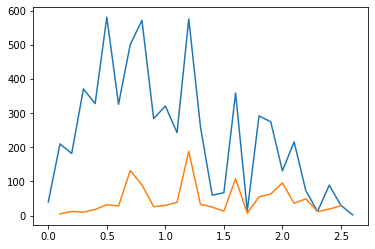

In [96]:
plt.plot(sumaP['trabajo'],sumaP['counts'])
plt.plot(suma4['trabajo'],suma4['counts'])

In [97]:
sumaP = sumaP[sumaP.trabajo.isin(suma4['trabajo'])]
sumaP



,trabajo,counts
15,0.1,210
16,0.2,182
4,0.3,371
6,0.4,328
0,0.5,581
7,0.6,326
3,0.7,501
2,0.8,572
10,0.9,284
8,1.0,321


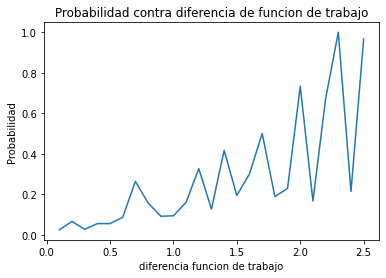

In [98]:
ss=[]
for i in range(len(suma4)):
  ss.append(suma4.iloc[i]['counts']/sumaP.iloc[i]['counts'])
plt.title('Probabilidad contra diferencia de funcion de trabajo')
plt.xlabel('diferencia funcion de trabajo')
plt.ylabel('Probabilidad')
plt.plot(sumaP['trabajo'],ss)